In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

MNIST 데이터셋 딥러닝 트레이닝을 위한 필요한 파이썬 모듈 임포트 

In [25]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
print(trainX.shape)
print(testX.shape)
print(trainY[0])
print(testY[0])

(60000, 28, 28)
(10000, 28, 28)
5
7


MNIST 데이터셋을 다운로드하고 트레이닝용 데이터와 검증용 데이터로 나눈다. 

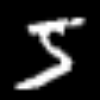

5


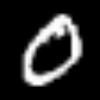

0


In [26]:
img = cv2.resize(trainX[0], (100, 100))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[0])
img = cv2.resize(trainX[1], (100, 100))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[1])

다운로드 된 MNIST 데이터 하나를 디스플레이 해서 보기 

In [27]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
print(trainX.shape)
print(testX.shape)

(60000, 784)
(10000, 784)


50000 x 28 x 28 x 1 의 행렬 형태의 입력 데이터를 50000 x 784 x 1의 행렬로 만든다. Flattening.  

In [28]:
print("Before normalizing: ", trainX[0])
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
print("After normalizing: ", trainX[0])

Before normalizing:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 2

입력 데이터의 flattening 이후에는 입력 데이터를 normalizing한다. Normalizing이전에는 입력데이터 하나하나의 값이 0 ~ 255인데, normalizing이후에는 0~1로 변경된다. 

In [29]:
print("Before label binarizing (trainY[0]): ", trainY[0])
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print("Before label binarizing (trainY[0]): ", trainY[0])

Before label binarizing (trainY[0]):  5
Before label binarizing (trainY[0]):  [0 0 0 0 0 1 0 0 0 0]


In [30]:
sgd = SGD(0.01)
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

역전파를 수행하는 경사강하법을 효율적으로 하기 위해서 옵티마이저를 SGD를 사용한다. 
텐서플로의 Sequencial 모듈을 사용해서 신경망을 구성한다. 
신경망은 입력을 제외하고 2개의 레이어 (256, 128, 10) 3개의 레이어로 구성된다. 마지막 레이어는 출력 레이어로 출력은 10개이다. 


In [31]:
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])

Sequential로 구성한 신경망 모델은 compile 명령을 통해서 만들어진다. 이때 로스함수(에러함수), 경사강하법에 사용되는 옵티마이저, metrics를 입력한다. 

In [32]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 2.2685 - accuracy: 0.2161 - val_loss: 2.2282 - val_accuracy: 0.3660
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.1910 - accuracy: 0.4231 - val_loss: 2.1451 - val_accuracy: 0.5546
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 2.0940 - accuracy: 0.5561 - val_loss: 2.0272 - val_accuracy: 0.5746
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.9534 - accuracy: 0.6112 - val_loss: 1.8575 - val_accuracy: 0.6664
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 1.7620 - accuracy: 0.6517 - val_loss: 1.6416 - val_accuracy: 0.6809
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.5407 - accuracy: 0.6897 - val_loss: 1.4156 - val_accuracy: 0.7243
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 1.3278 - accuracy: 0.7239 - val_loss: 1.2171 - val_accuracy: 0.7440

fit 명령을 통해서 신경망 트레이닝을 진행한다. epochs에 지정된 회수만큼 트레이닝을 반복진행한다. batch_size는 한번에 신경망에 투입되는 입력값의 갯수이다. 

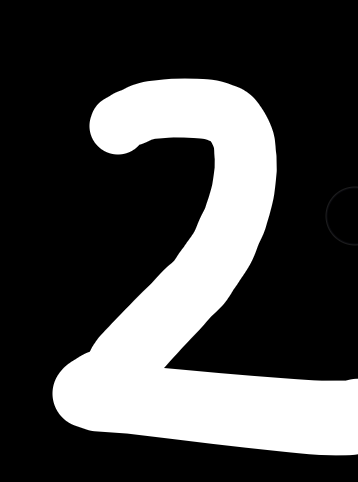

In [44]:
img = cv2.imread('2_1.png')
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

신경망 트레이닝이 끝이나면 테스트를 위해서 숫자 이미지를 로드한다. 

In [45]:
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.reshape(img, (784, ))

X = np.asarray([img])
predictions = model(X, training=False)
print(predictions)
print(np.argmax(predictions))

tf.Tensor(
[[1.0143999e-05 6.2730510e-06 9.1457826e-01 5.2250236e-02 6.4228187e-09
  5.7523266e-06 1.5249597e-09 2.3492085e-04 3.2886073e-02 2.8306653e-05]], shape=(1, 10), dtype=float32)
2


로드된 숫자 이미지를 신경망에 통과시켜서 숫자값을 예측해 본다. 트레이닝 데이터와 로드한 숫자 이미지 데이터를 비교해서 데이터가 제대로 학습이 되었는지 비교해볼 수 있다. 

In [47]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.94      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.90      0.89       974
           9       0.90      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



트레이닝된 신경망이 얼마나 정확한지 테스트 데이터셋으로 검증을 해본다. 

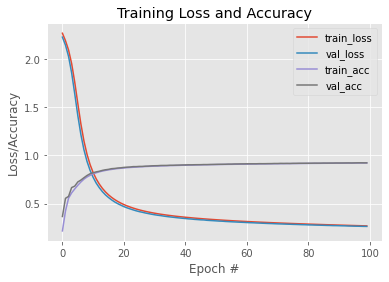

In [48]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('kera_mnist.png')
plt.show()

신경망의 학습 정확도를 그래픽으로 플로팅 해본다. 